In [ ]:
import pandas as pd
import numpy as np
from time import time
#from sklearn.pipeline import FeatureUnion
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from itertools import combinations
from tqdm import tnrange, tqdm_notebook
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Lasso, Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from math import log
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
diabetes = pd.read_csv("/diabetes.csv",header = 0)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
(diabetes == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

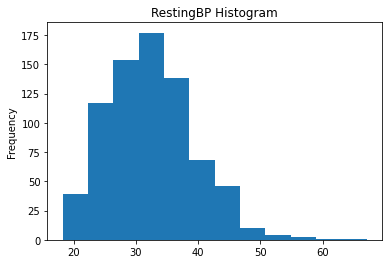

In [ ]:
diabetes = diabetes.loc[diabetes.BMI != 0]

diabetes["BMI"].plot(kind='hist', bins=12, title='RestingBP Histogram')

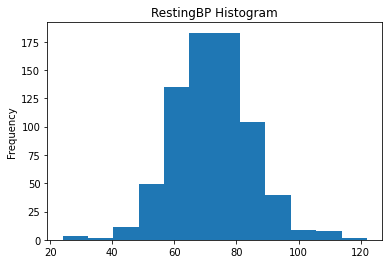

In [ ]:
diabetes = diabetes.loc[diabetes.BloodPressure != 0]

diabetes["BloodPressure"].plot(kind='hist', bins=12, title='RestingBP Histogram')

In [ ]:
diabetes.SkinThickness.replace(0, diabetes.SkinThickness.median(), inplace=True)
diabetes.Insulin.replace(0, diabetes.Insulin.median(), inplace=True)
diabetes.Glucose.replace(0, diabetes.Glucose.median(), inplace=True)
diabetes.BloodPressure.replace(0, diabetes.BloodPressure.median(), inplace=True)
diabetes.BMI.replace(0, diabetes.BMI.median(), inplace=True)

In [ ]:
num_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'DiabetesPedigreeFunction', 'BMI', 'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


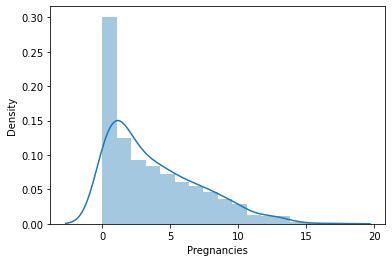

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


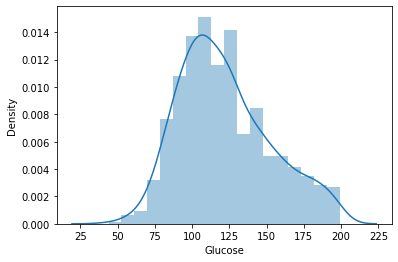

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


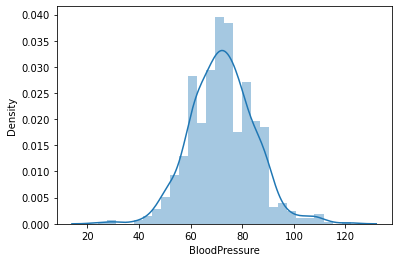

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


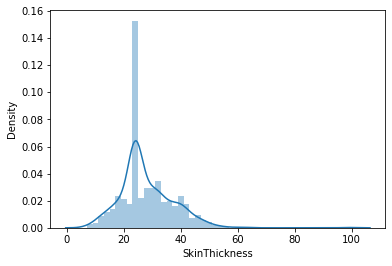

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


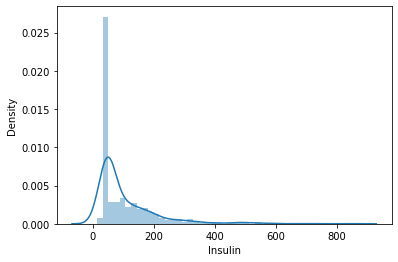

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


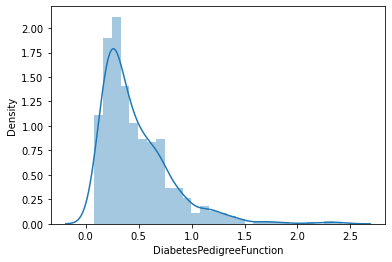

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


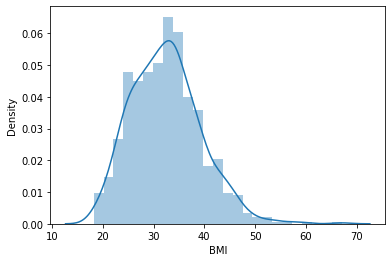

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


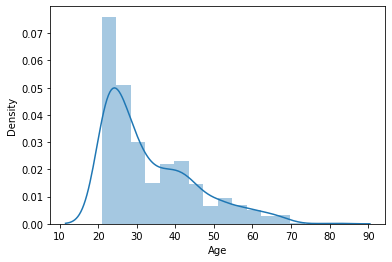

In [ ]:
for col in diabetes[num_col]:
    plt.figure()
    sns.distplot(diabetes[col])
    plt.show()

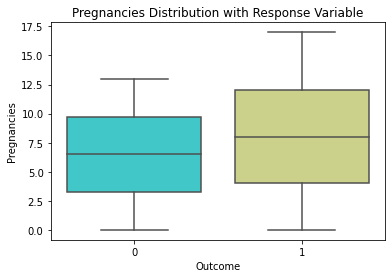

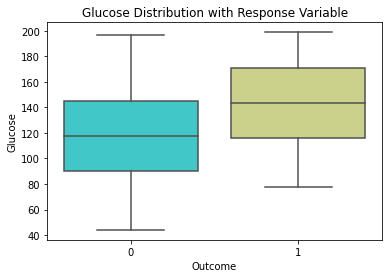

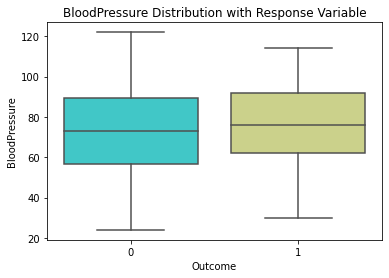

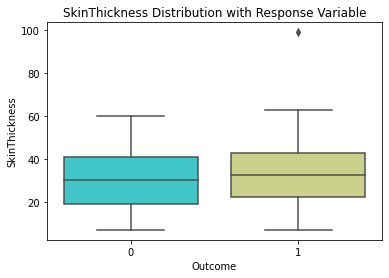

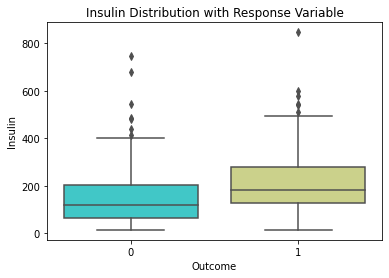

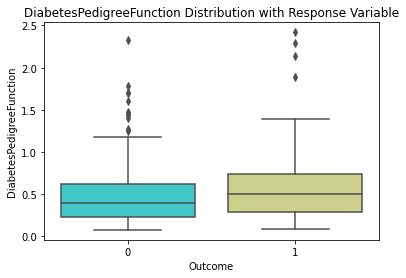

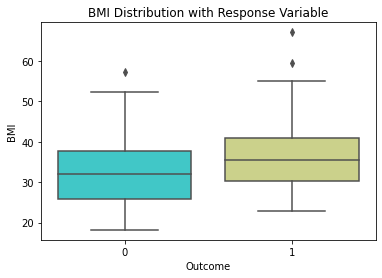

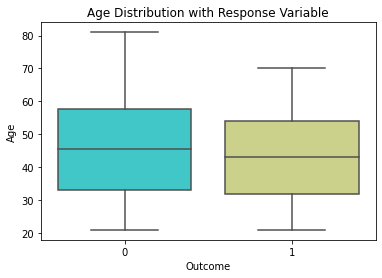

In [ ]:
for col in diabetes[num_col]:
    d = pd.DataFrame(diabetes.groupby([col,"Outcome"]).size())
    d = d.rename(columns = {0:"Count"})
    d.reset_index(inplace= True)

    plt.figure()
    ax = sns.boxplot(x='Outcome',y=col,data=d, palette='rainbow').set(title =f"{col} Distribution with Response Variable")

In [ ]:
oversample = SMOTE()
Y=diabetes.Outcome
X=diabetes.loc[:,diabetes.columns != 'Outcome']
X_res, y_res = oversample.fit_resample(X,Y)

In [ ]:
diabetes=pd.concat([X_res,y_res],axis=1)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,46,33.600000,0.627000,50,1
1,1,85,66,29,46,26.600000,0.351000,31,0
2,8,183,64,24,46,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
951,6,131,70,24,46,29.322342,0.476123,52,1
952,14,166,72,41,117,38.963584,0.793857,44,1
953,1,133,64,27,120,32.375865,0.297203,26,1
954,7,136,73,47,127,38.228991,0.528433,41,1


In [ ]:
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {'Logistic': LogisticRegression(random_state=0),
         'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=0),
         'RandomForestClassifier' : RandomForestClassifier(random_state=0),
         'KNeighborsClassifier': KNeighborsClassifier(),
          'BaggingClassifier': BaggingClassifier(random_state=0),
          'SVC': LinearSVC(random_state=0),
          'NaiveBayes': GaussianNB(),
          'AdaBoost': AdaBoostClassifier(random_state=0),
          'XGBoost': XGBClassifier(random_state=0),
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0)}

In [ ]:
results = pd.DataFrame(columns=["ExpID", "Accuracy","Precision","Recall","F1 score", "Sensitivity", "Specifity","Train Time(s)", "Experiment description"])

def get_results(model, X, y, X_test, y_test, name='model_name', desc='experiment'):
    start = time()
    model.fit(X, y)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    mat = confusion_matrix(y_test, y_pred, labels=[0,1])
    sensitivity = mat[0,0]/(mat[0,0] + mat[1,0])
    specifity = mat[1,1]/(mat[1,1] + mat[0,1])
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    train_time = np.round(time() - start, 4)
    results.loc[results.shape[0]+1] = [name, acc, prec, rec, f1,sensitivity, specifity,train_time, desc]

In [ ]:
for name, model in models.items():
    get_results(model, X_train, y_train, X_test, y_test, 'Initial Search', 'Untuned ' + name)

display(results)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,ExpID,Accuracy,Precision,Recall,F1 score,Sensitivity,Specifity,Train Time(s),Experiment description
1,Initial Search,0.744792,0.720430,0.744444,0.732240,0.767677,0.720430,0.0139,Untuned Logistic
2,Initial Search,0.734375,0.685714,0.800000,0.738462,0.793103,0.685714,0.0073,Untuned DecisionTreeClassifier
3,Initial Search,0.833333,0.778846,0.900000,0.835052,0.897727,0.778846,0.2307,Untuned RandomForestClassifier
4,Initial Search,0.796875,0.729730,0.900000,0.805970,0.888889,0.729730,0.0259,Untuned KNeighborsClassifier
5,Initial Search,0.791667,0.760417,0.811111,0.784946,0.822917,0.760417,0.0460,Untuned BaggingClassifier
6,Initial Search,0.739583,0.717391,0.733333,0.725275,0.760000,0.717391,0.0418,Untuned SVC
7,Initial Search,0.718750,0.695652,0.711111,0.703297,0.740000,0.695652,0.0045,Untuned NaiveBayes
8,Initial Search,0.802083,0.760000,0.844444,0.800000,0.847826,0.760000,0.1256,Untuned AdaBoost
9,Initial Search,0.802083,0.750000,0.866667,0.804124,0.863636,0.750000,0.1491,Untuned XGBoost
10,Initial Search,0.807292,0.757282,0.866667,0.808290,0.865169,0.757282,0.1838,Untuned GradientBoostingClassifier


In [ ]:
#Check and see where within the range of 0 to 400 gives the best MSE
model = RandomForestClassifier(random_state=0)

gs = GridSearchCV(model, param_grid = {'n_estimators': range(300,320)}, cv=10, n_jobs=1,scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print("MSE: ",-gs.best_score_)
trees=gs.best_params_['n_estimators']

{'n_estimators': 300}
MSE:  0.17274436090225564


In [ ]:
#Use GridSearchCV to determine other parameters given number of trees computed
model = RandomForestClassifier(random_state=0)

gscv = GridSearchCV(model,
                  param_grid = {'n_estimators': range(trees, trees+1),
                                'max_depth': range(1, 11),
                                'min_samples_split': range(1, 11)}, cv=10, n_jobs=1,scoring='neg_mean_squared_error')
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print("MSE: ",-gscv.best_score_)
estimators=gscv.best_params_['n_estimators']
depth=gscv.best_params_['max_depth']
split=gscv.best_params_['min_samples_split']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 300}
MSE:  0.1792891319207109


In [ ]:
get_results(RandomForestClassifier(random_state=0,n_estimators=304,max_depth = 9, min_samples_split= 4),
            X_train, y_train, X_test, y_test, 'Final', 'Tuned ' + name)

display(results)

,ExpID,Accuracy,Precision,Recall,F1 score,Sensitivity,Specifity,Train Time(s),Experiment description
1,Initial Search,0.744792,0.720430,0.744444,0.732240,0.767677,0.720430,0.0139,Untuned Logistic
2,Initial Search,0.734375,0.685714,0.800000,0.738462,0.793103,0.685714,0.0073,Untuned DecisionTreeClassifier
3,Initial Search,0.833333,0.778846,0.900000,0.835052,0.897727,0.778846,0.2307,Untuned RandomForestClassifier
4,Initial Search,0.796875,0.729730,0.900000,0.805970,0.888889,0.729730,0.0259,Untuned KNeighborsClassifier
5,Initial Search,0.791667,0.760417,0.811111,0.784946,0.822917,0.760417,0.0460,Untuned BaggingClassifier
6,Initial Search,0.739583,0.717391,0.733333,0.725275,0.760000,0.717391,0.0418,Untuned SVC
7,Initial Search,0.718750,0.695652,0.711111,0.703297,0.740000,0.695652,0.0045,Untuned NaiveBayes
8,Initial Search,0.802083,0.760000,0.844444,0.800000,0.847826,0.760000,0.1256,Untuned AdaBoost
9,Initial Search,0.802083,0.750000,0.866667,0.804124,0.863636,0.750000,0.1491,Untuned XGBoost
10,Initial Search,0.807292,0.757282,0.866667,0.808290,0.865169,0.757282,0.1838,Untuned GradientBoostingClassifier


In [ ]:
german_train = pd.read_csv("/train.csv",header = 0)
german_train.head()
german_test = pd.read_csv("/test.csv",header = 0)
german_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id,split
0,0,84,82,31,125,38.2,0.233,23,0,1,2.279165
1,0,145,0,0,0,44.2,0.630,31,1,2,0.751868
2,1,139,62,41,480,40.7,0.536,21,0,4,0.928773
3,4,125,70,18,122,28.9,1.144,45,1,11,0.134273
4,2,84,50,23,76,30.4,0.968,21,0,26,1.587001


In [ ]:
german_final = pd.concat([german_train,german_test])

In [ ]:
german_final = german_final.drop(['Id', 'split'], axis =1)

In [ ]:
(german_final == 0).sum(axis=0)

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

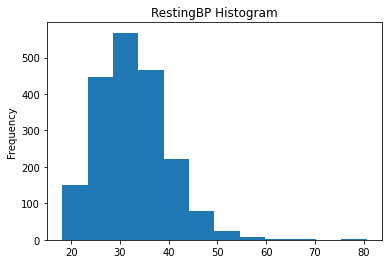

In [ ]:
german_final = german_final.loc[german_final.BMI != 0]

german_final["BMI"].plot(kind='hist', bins=12, title='RestingBP Histogram')

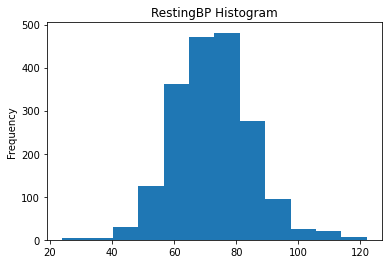

In [ ]:
german_final = german_final.loc[german_final.BloodPressure != 0]

german_final["BloodPressure"].plot(kind='hist', bins=12, title='RestingBP Histogram')

In [ ]:
german_final.SkinThickness.replace(0, german_final.SkinThickness.median(), inplace=True)
german_final.Insulin.replace(0, german_final.Insulin.median(), inplace=True)
german_final.Glucose.replace(0, german_final.Glucose.median(), inplace=True)
german_final.BloodPressure.replace(0, german_final.BloodPressure.median(), inplace=True)
german_final.BMI.replace(0, german_final.BMI.median(), inplace=True)

In [ ]:
X_h = german_final.iloc[:, :-1].values
y_h = german_final.iloc[:, -1].values

In [ ]:
scaler = StandardScaler()
X_ger_scaled = scaler.fit_transform(X_h)

In [ ]:
get_results(RandomForestClassifier(random_state=0,n_estimators=304,max_depth = 9, min_samples_split= 4),
            X_train, y_train, X_ger_scaled, y_h, 'Final', 'Unknown test ' + name)

display(results)

,ExpID,Accuracy,Precision,Recall,F1 score,Sensitivity,Specifity,Train Time(s),Experiment description
1,Initial Search,0.744792,0.720430,0.744444,0.732240,0.767677,0.720430,0.0139,Untuned Logistic
2,Initial Search,0.734375,0.685714,0.800000,0.738462,0.793103,0.685714,0.0073,Untuned DecisionTreeClassifier
3,Initial Search,0.833333,0.778846,0.900000,0.835052,0.897727,0.778846,0.2307,Untuned RandomForestClassifier
4,Initial Search,0.796875,0.729730,0.900000,0.805970,0.888889,0.729730,0.0259,Untuned KNeighborsClassifier
5,Initial Search,0.791667,0.760417,0.811111,0.784946,0.822917,0.760417,0.0460,Untuned BaggingClassifier
6,Initial Search,0.739583,0.717391,0.733333,0.725275,0.760000,0.717391,0.0418,Untuned SVC
7,Initial Search,0.718750,0.695652,0.711111,0.703297,0.740000,0.695652,0.0045,Untuned NaiveBayes
8,Initial Search,0.802083,0.760000,0.844444,0.800000,0.847826,0.760000,0.1256,Untuned AdaBoost
9,Initial Search,0.802083,0.750000,0.866667,0.804124,0.863636,0.750000,0.1491,Untuned XGBoost
10,Initial Search,0.807292,0.757282,0.866667,0.808290,0.865169,0.757282,0.1838,Untuned GradientBoostingClassifier
